# Create publication plots

#### Configure matplotlib for final figure styles

In [1]:
%matplotlib inline
# Configure matplotlib
from s90_helper_functions import *
configure_matplotlib()

# Other imports
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd 

#### Read data

In [2]:
snr_data = pd.read_csv('./data/final_csv/snr.csv')

#### SNR plots

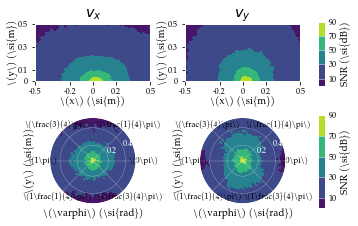

In [3]:
# Only keep sensor 5
sensor_number = 5
snr = snr_data.query('sensor_number == ' + str(sensor_number))
x_pos = (sensor_number - 1) * (0.4/7) - 0.2;
filtered_snr = snr.query('x_source >= ' + str(x_pos - 0.1) + ' & x_source <= ' + str(x_pos + 0.1))

width, height = figure_dimensions(0.8)
fig = plt.figure(figsize=(width, height))
plt.subplot(2, 2, 1)
plot_spatial_heatmap('x_bin', 'y_bin', 'snr', [0, 10, 30, 50, 70, 90],
                     data=snr.query('velocity_component == \'x\''))
plt.xlabel('\(x\) (\si{m})', labelpad=0)
plt.ylabel('\(y\) (\si{m})', labelpad=0)
plt.title('$v_x$')

plt.subplot(2, 2, 3, projection='polar')
plot_orienation_heatmap('orientation_bin', 'y_bin', 'snr', 
                        [0, 10, 30, 50, 70, 90],
                        data=filtered_snr.query('velocity_component == \'x\''),
                        yticks=[0.2, 0.4])

plt.subplot(2, 2, 2)
plot_spatial_heatmap('x_bin', 'y_bin', 'snr', [0, 10, 30, 50, 70, 90],
                     data=snr.query('velocity_component == \'y\''))
plt.xlabel('\(x\) (\si{m})', labelpad=0)
plt.ylabel('\(y\) (\si{m})', labelpad=0)
plt.title('$v_y$')

plt.subplot(2, 2, 4, projection='polar')
plot_orienation_heatmap('orientation_bin', 'y_bin', 'snr', 
                        [0, 10, 30, 50, 70, 90],
                        data=filtered_snr.query('velocity_component == \'y\''),
                        yticks=[0.2, 0.4])
fig.subplots_adjust(wspace=0.3, hspace=0.25, top=0.99, bottom=0.1, 
                    left=0.1, right=0.85)
fix_polar_grid(fig)

for idx in [2, 3]:
    ax_pos = fig.axes[idx].get_position()
    height = ax_pos.y1 - ax_pos.y0 +0.03
    rect = [0.90, ax_pos.y0-0.02, 0.02, height]
    cbar_ax = fig.add_axes(rect)
    c = plt.colorbar(cax=cbar_ax,
                     drawedges=True,
                     spacing='proportional',
                     ticks=[10, 30, 50, 70, 90])
    c.set_label(r'SNR (\si{dB})')
    c.ax.tick_params(axis='y', direction='in', length=0)    

fig.savefig('images/publication/snr')